In [332]:
import scipy as sc
import pandas as pd
from seaborn import scatterplot,pointplot
import matplotlib.pyplot as plt
import re
import math
from sklearn.linear_model import LinearRegression
from io import StringIO

In [333]:
class ProjectileData:
    def __init__(self,file_name):
        self.pj_data = pd.DataFrame(columns=['Run','File_name','Velocity','Flight_time'])
        self.add(file_name)
    
    def add(self,file_name):
        runs = []
        velocities = []
        flight_times = []
        file_names = []
        with open(file_name,'r') as f:
            run_str = ''
            velocity = None
            flight_time = None
            start_read = False
            end_read = False
            for line in f:
                if line == '\n':
                    continue
                if line.startswith('Vernier') and start_read:
                    end_read = True
                    if flight_time > 2.0 or flight_time < 0.5:
                        run_str = ''
                        velocity = None
                        flight_time = None
                        start_read = False
                        continue
                    runs.append(run_str)
                    velocities.append(velocity)
                    flight_times.append(flight_time)
                    file_names.append(file_name)
                    run_str = ''
                    velocity = None
                    flight_time = None
                    start_read = False
                    continue
                if line.startswith('Run'):
                    run_str = line.rstrip('\n')
                    start_read = True
                    end_read = False
                    continue
                if start_read and not end_read:
                    if line.isspace():
                        continue
                    if line.startswith('Time') or line.startswith('T') or line.startswith('s'):
                        continue
                    tmp_line = line.rstrip('\t\n')
                    if len(tmp_line.split('\t')) == 4 and velocity is None:
                        velocity = float(tmp_line.split('\t')[3])
                        continue
                    if velocity is not None:
                        flight_time = float(line.split('\t')[0])
                        
        data = pd.DataFrame()
        data['Run'] = runs
        data['File_name'] = file_names
        data['Velocity'] = velocities
        data['Flight_time'] = flight_times
        self.pj_data = pd.concat([self.pj_data,data])


In [334]:
pj = ProjectileData('D:BASIS/Labs/HonorsAP/Launch_Data_Back_Group.txt')

In [335]:
print(pj.pj_data)

       Run                                         File_name  Velocity  \
0    Run 2  D:BASIS/Labs/HonorsAP/Launch_Data_Back_Group.txt     5.147   
1    Run 3  D:BASIS/Labs/HonorsAP/Launch_Data_Back_Group.txt     4.964   
2    Run 4  D:BASIS/Labs/HonorsAP/Launch_Data_Back_Group.txt     4.924   
3    Run 5  D:BASIS/Labs/HonorsAP/Launch_Data_Back_Group.txt     5.103   
4    Run 6  D:BASIS/Labs/HonorsAP/Launch_Data_Back_Group.txt     5.100   
5    Run 7  D:BASIS/Labs/HonorsAP/Launch_Data_Back_Group.txt     5.046   
6    Run 8  D:BASIS/Labs/HonorsAP/Launch_Data_Back_Group.txt     4.509   
7    Run 9  D:BASIS/Labs/HonorsAP/Launch_Data_Back_Group.txt     4.560   
8   Run 10  D:BASIS/Labs/HonorsAP/Launch_Data_Back_Group.txt     4.394   
9   Run 11  D:BASIS/Labs/HonorsAP/Launch_Data_Back_Group.txt     4.695   
10  Run 12  D:BASIS/Labs/HonorsAP/Launch_Data_Back_Group.txt     4.717   
11  Run 13  D:BASIS/Labs/HonorsAP/Launch_Data_Back_Group.txt     4.650   
12  Run 14  D:BASIS/Labs/HonorsAP/Laun

In [336]:
pj.add('D:BASIS/Labs/HonorsAP/Launch_Data_Front_Group.txt')

In [337]:
print(pj.pj_data)

       Run                                          File_name  Velocity  \
0    Run 2   D:BASIS/Labs/HonorsAP/Launch_Data_Back_Group.txt     5.147   
1    Run 3   D:BASIS/Labs/HonorsAP/Launch_Data_Back_Group.txt     4.964   
2    Run 4   D:BASIS/Labs/HonorsAP/Launch_Data_Back_Group.txt     4.924   
3    Run 5   D:BASIS/Labs/HonorsAP/Launch_Data_Back_Group.txt     5.103   
4    Run 6   D:BASIS/Labs/HonorsAP/Launch_Data_Back_Group.txt     5.100   
5    Run 7   D:BASIS/Labs/HonorsAP/Launch_Data_Back_Group.txt     5.046   
6    Run 8   D:BASIS/Labs/HonorsAP/Launch_Data_Back_Group.txt     4.509   
7    Run 9   D:BASIS/Labs/HonorsAP/Launch_Data_Back_Group.txt     4.560   
8   Run 10   D:BASIS/Labs/HonorsAP/Launch_Data_Back_Group.txt     4.394   
9   Run 11   D:BASIS/Labs/HonorsAP/Launch_Data_Back_Group.txt     4.695   
10  Run 12   D:BASIS/Labs/HonorsAP/Launch_Data_Back_Group.txt     4.717   
11  Run 13   D:BASIS/Labs/HonorsAP/Launch_Data_Back_Group.txt     4.650   
12  Run 14   D:BASIS/Labs

In [379]:
mean_flight_time = pj.pj_data['Flight_time'].mean()
std_flight_time = pj.pj_data['Flight_time'].std()
flight_time_err = std_flight_time/math.sqrt(len(pj.pj_data))
print(mean_flight_time,std_flight_time/math.sqrt(len(pj.pj_data)))

pj.pj_data['Range'] = pj.pj_data['Velocity']*pj.pj_data['Flight_time']
pj.pj_data['Range_error'] = std_flight_time/math.sqrt(len(pj.pj_data))/mean_flight_time*pj.pj_data['Range']

1.4519225 0.0014081071231585572


$R^{2}$: 0.9994012681318726
intercept: -0.2053191632754494
slope: 1.492473021374578


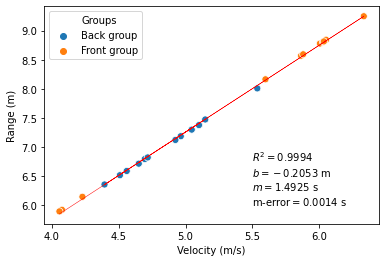

In [414]:
fig = plt.figure()
ax = scatterplot(data=pj.pj_data,x='Velocity',y='Range',hue='File_name',s=50)

X = pj.pj_data.iloc[:, 2].values.reshape(-1, 1)
Y = pj.pj_data.iloc[:, 4].values.reshape(-1, 1)
model = LinearRegression()
model.fit(X,Y)

r2 = model.score(X,Y)
y_int = model.intercept_[0]
slope = model.coef_[0][0]
print(r'$R^{2}$:',r2)
print('intercept:', y_int)
print('slope:', slope)

pj.pj_data['Range_prediction'] = model.predict(X)
ax.plot(X,pj.pj_data['Range_prediction'],color='red',linestyle='-',linewidth=0.5)
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['Groups','Back group','Front group'])
ax.set_xlabel('Velocity (m/s)')
ax.set_ylabel('Range (m)')
ax.annotate(r'$R^{2} = %0.4f$'%r2,(5.5,6.75))
ax.annotate(r'$b = %0.4f~\mathrm{m}$'%y_int,(5.5,6.5))
ax.annotate(r'$m = %0.4f~\mathrm{s}$'%slope,(5.5,6.25))
ax.annotate(r'm-error$= %0.4f~\mathrm{s}$'%flight_time_err,(5.5,6.0))
fig.savefig('D:/BASIS/Labs/HonorsAP/projectile_motion1.pdf')